#Assignment 09: More Advanced DL Applications

This Week's assignment is to train forecasting model on the `Daily Temperature Data`.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 09: More Advanced DL Applications - Zahraa Dhafer).
<br><br>
**Submission Deadline: Saturday, 3/19/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries.
2. Download the dataset (the link is provided below).
3. Read data from CSV file.
4. Prepare the data:
*   Use the data from Spain using the query method in the Country column.
*   Drop the columns that are not required.
*   Normalize the dataset.
*   Plot the histogram of the dataset before and after the normalization.
<br>
5. Create the time series dataset using Time Series Data Generator.
6. Create data from the generator and split the data into training and testing.
7. Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1).
8. Get the max value of the dataset.
9. Create the Data Pipeline.
10. Create the Forecasting Model.<br>
11. Plot the model prediction.
**Note**: Use Adam optimizer and the appropriate loss function.


**Note:** To get the best performance from the model, manually tune the hyperparameters of the model. 

Find relevant links below:<br>

[Assignment Colab File](https://colab.research.google.com/drive/1OfPmlyGP-1gy_2pfErdQMTtAvCY1jgy-?usp=sharing)<br>

[Dataset](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSdFXlEVjD1HPK_DMBbXjJ6XERmAVUpfqX9n-b0nFuCT9HpjYQ/viewform?usp=pp_url)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

##1- Import all necessary libraries

In [ ]:
# write your code below
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection


##2- Download the dataset

In [ ]:
# write your code below


! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities


 70% 9.00M/12.9M [00:00<00:00, 75.7MB/s]
100% 12.9M/12.9M [00:00<00:00, 86.7MB/s]


In [ ]:
!unzip /content/daily-temperature-of-major-cities.zip

Archive:  /content/daily-temperature-of-major-cities.zip
  inflating: city_temperature.csv    


##3- Read data from CSV file

In [ ]:
# write your code below
df=pd.read_csv('/content/city_temperature.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


##4- Prepare the data



*   Use the data from Spain using the query method in the Country column.
*   Drop the columns that are not required.
*   Normalize the datase.
*   Plot the histagram of the dataset before and after the normalization.

In [ ]:
# write your code below
dataset = df.query('(Country == "Spain")')
dataset.drop(labels=['Region','State','City','Month','Day','Year'],axis=1,inplace=True)
dataset.reset_index(drop=True,inplace=True)
dataset



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,AvgTemperature
0,Spain,50.8
1,Spain,44.5
2,Spain,41.0
3,Spain,39.2
4,Spain,39.8
...,...,...
27793,Spain,67.0
27794,Spain,60.1
27795,Spain,60.6
27796,Spain,55.3


In [ ]:
dataset=dataset[dataset.AvgTemperature>-4]

In [ ]:
dataset.iloc[dataset.AvgTemperature.argmax()]

Country           Spain
AvgTemperature     94.6
Name: 12403, dtype: object

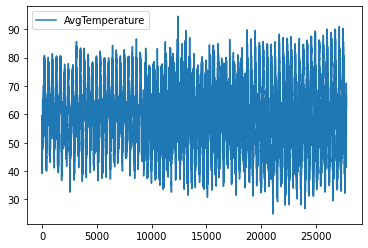

In [ ]:
dataset.plot()

In [ ]:
noramlizer=preprocessing.MinMaxScaler()
noramlizer.fit(dataset.AvgTemperature.to_numpy().reshape(-1,1))
norm=noramlizer.transform(dataset.AvgTemperature.to_numpy().reshape(-1,1))

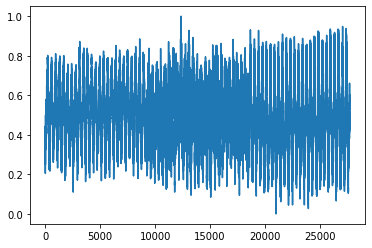

In [ ]:
plt.plot(norm)

##5- Create the time series dataset using Time Series Data Generator

In [ ]:
# write your code below
data_ts=tf.keras.preprocessing.sequence.TimeseriesGenerator(data=norm,
                                                                targets=dataset.AvgTemperature.to_numpy().reshape(-1,1),
                                                                length=14,batch_size=32
                                                                )


In [ ]:
x,y=data_ts[0]
print(x.shape)
print(y.shape)

(32, 14, 1)
(32, 1)


In [ ]:
x[:2]

array([[[0.37159254],
        [0.28120516],
        [0.23098996],
        [0.20516499],
        [0.21377331],
        [0.29124821],
        [0.28550933],
        [0.25107604],
        [0.36298422],
        [0.3758967 ],
        [0.44332855],
        [0.37159254],
        [0.32711621],
        [0.24964132]],

       [[0.28120516],
        [0.23098996],
        [0.20516499],
        [0.21377331],
        [0.29124821],
        [0.28550933],
        [0.25107604],
        [0.36298422],
        [0.3758967 ],
        [0.44332855],
        [0.37159254],
        [0.32711621],
        [0.24964132],
        [0.25681492]]])

In [ ]:
y[:2]

array([[42.8],
       [46. ]])

##6- Create data from the generator and split the data into training and testing

In [ ]:
# write your code below
x_data=np.array([])
y_data=np.array([])

for x,y in data_ts:
  x_data=np.append(x_data,x)
  y_data=np.append(y_data,y)
x_data=x_data.reshape(-1,14,1)

x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,test_size=0.1,shuffle=False
                                                               
                                                               
                                                               
                                                               
                                                               
                                                               
                                                               )


##7- Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1)

In [ ]:
# write your code below

print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(24928, 14, 1)
(24928,)
(2770, 14, 1)
(2770,)


##8- Get the max value of the dataset

In [ ]:
# write your code below
dataMax=noramlizer.data_max_[0]
dataMax

94.6

##9- Create the Data Pipeline

In [ ]:
# write your code below
def data_pipeline(x,y):
  data=tf.data.Dataset.from_tensor_slices((x,y))
  data=data.shuffle(1024)
  data=data.batch(batch_size=32)
  data=data.prefetch(tf.data.AUTOTUNE)

  return data

train_data= data_pipeline(x_train,y_train)
test_data=(x_test,y_test)

##10- Create the Forcasting Model

##simple_GRU

In [ ]:
# write your code below
tf.keras.backend.clear_session()
simple_gru_model=tf.keras.Sequential([
                                      tf.keras.layers.Input(shape=(14,1)),
                                      tf.keras.layers.GRU(units=32),
                                      tf.keras.layers.Dense(1),
                                      tf.keras.layers.Lambda(lambda x:x*dataMax)
                                      
])
simple_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
simple_gru_model.compile(optimizer='adam',loss='mse')
simple_gru_model.fit(train_data,epochs=12,validation_data=test_data)

Epoch 1/12
779/779 [==============================] - 13s 12ms/step - loss: 44.6159 - val_loss: 12.5226
Epoch 2/12
779/779 [==============================] - 9s 11ms/step - loss: 11.4335 - val_loss: 12.1141
Epoch 3/12
779/779 [==============================] - 8s 11ms/step - loss: 11.1134 - val_loss: 11.3398
Epoch 4/12
779/779 [==============================] - 6s 7ms/step - loss: 10.9787 - val_loss: 11.6454
Epoch 5/12
779/779 [==============================] - 6s 7ms/step - loss: 10.9666 - val_loss: 11.0903
Epoch 6/12
779/779 [==============================] - 6s 7ms/step - loss: 10.9131 - val_loss: 11.2006
Epoch 7/12
779/779 [==============================] - 5s 7ms/step - loss: 10.9066 - val_loss: 12.3442
Epoch 8/12
779/779 [==============================] - 5s 7ms/step - loss: 10.9536 - val_loss: 11.9340
Epoch 9/12
779/779 [==============================] - 6s 8ms/step - loss: 11.0394 - val_loss: 12.2894
Epoch 10/12
779/779 [==============================] - 5s 7ms/step - loss: 10.

##deep_GRU

In [ ]:
# write your code below
tf.keras.backend.clear_session()
deep_gru_model=tf.keras.Sequential([
                                      tf.keras.layers.Input(shape=(14,1)),
                                      tf.keras.layers.GRU(units=64,return_sequences=True),
                                      tf.keras.layers.GRU(units=64),
                                      tf.keras.layers.Dense(1),
                                      tf.keras.layers.Lambda(lambda x:x*dataMax)
                                      
])
deep_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 64)            12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
deep_gru_model.compile(optimizer='adam',loss='mse')
deep_gru_model.fit(train_data,epochs=12,validation_data=test_data)

Epoch 1/12
779/779 [==============================] - 18s 17ms/step - loss: 32.9595 - val_loss: 11.2794
Epoch 2/12
779/779 [==============================] - 12s 16ms/step - loss: 11.1703 - val_loss: 12.2373
Epoch 3/12
779/779 [==============================] - 12s 15ms/step - loss: 11.3727 - val_loss: 10.9451
Epoch 4/12
779/779 [==============================] - 12s 16ms/step - loss: 11.4294 - val_loss: 11.2510
Epoch 5/12
779/779 [==============================] - 13s 16ms/step - loss: 11.3831 - val_loss: 10.9531
Epoch 6/12
779/779 [==============================] - 13s 16ms/step - loss: 11.2914 - val_loss: 11.6899
Epoch 7/12
779/779 [==============================] - 12s 16ms/step - loss: 11.2296 - val_loss: 14.0394
Epoch 8/12
779/779 [==============================] - 12s 16ms/step - loss: 11.1354 - val_loss: 11.1065
Epoch 9/12
779/779 [==============================] - 12s 16ms/step - loss: 11.1790 - val_loss: 11.1713
Epoch 10/12
779/779 [==============================] - 12s 16ms/

## Conv1 GRU_deep

In [ ]:
# write your code below
tf.keras.backend.clear_session()
conv_gru_model=tf.keras.Sequential([
                                      tf.keras.layers.Input(shape=(14,1)),
                                      tf.keras.layers.Conv1D(filters=16,kernel_size=3,activation='relu',padding='causal'),
                                      tf.keras.layers.GRU(units=64,return_sequences=True),
                                      tf.keras.layers.GRU(units=64),
                                      tf.keras.layers.Dense(1),
                                      tf.keras.layers.Lambda(lambda x:x*dataMax)
                                      
])
conv_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 16)            64        
                                                                 
 gru (GRU)                   (None, 14, 64)            15744     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 40,833
Trainable params: 40,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_gru_model.compile(optimizer='adam',loss='mse')
conv_gru_model.fit(train_data,epochs=12,validation_data=test_data)

Epoch 1/12
779/779 [==============================] - 18s 19ms/step - loss: 34.5349 - val_loss: 11.6559
Epoch 2/12
779/779 [==============================] - 13s 17ms/step - loss: 11.3323 - val_loss: 11.3229
Epoch 3/12
779/779 [==============================] - 13s 17ms/step - loss: 11.3070 - val_loss: 11.2396
Epoch 4/12
779/779 [==============================] - 13s 17ms/step - loss: 11.4687 - val_loss: 10.9203
Epoch 5/12
779/779 [==============================] - 13s 17ms/step - loss: 11.5853 - val_loss: 12.9564
Epoch 6/12
779/779 [==============================] - 15s 19ms/step - loss: 11.2248 - val_loss: 10.9038
Epoch 7/12
779/779 [==============================] - 14s 18ms/step - loss: 11.2471 - val_loss: 11.2491
Epoch 8/12
779/779 [==============================] - 14s 18ms/step - loss: 11.4100 - val_loss: 11.6619
Epoch 9/12
779/779 [==============================] - 19s 24ms/step - loss: 11.0725 - val_loss: 14.4184
Epoch 10/12
779/779 [==============================] - 14s 18ms/

## Conv 1 GRU_deep with Huber

In [ ]:
# write your code below
tf.keras.backend.clear_session()
huber_gru_model=tf.keras.Sequential([
                                      tf.keras.layers.Input(shape=(14,1)),
                                      tf.keras.layers.Conv1D(filters=16,kernel_size=3,activation='relu',padding='causal'),
                                      tf.keras.layers.GRU(units=64,return_sequences=True),
                                      tf.keras.layers.GRU(units=64),
                                      tf.keras.layers.Dense(1),
                                      tf.keras.layers.Lambda(lambda x:x*dataMax)
                                      
])
huber_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 16)            64        
                                                                 
 gru (GRU)                   (None, 14, 64)            15744     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 40,833
Trainable params: 40,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
huber_gru_model.compile(optimizer='adam',loss=tf.losses.huber)
huber_gru_model.fit(train_data,epochs=12,validation_data=test_data)

Epoch 1/12
779/779 [==============================] - 20s 20ms/step - loss: 2.8262 - val_loss: 2.3256
Epoch 2/12
779/779 [==============================] - 14s 18ms/step - loss: 2.1059 - val_loss: 2.7694
Epoch 3/12
779/779 [==============================] - 14s 18ms/step - loss: 2.1028 - val_loss: 2.2113
Epoch 4/12
779/779 [==============================] - 15s 19ms/step - loss: 2.0991 - val_loss: 2.5219
Epoch 5/12
779/779 [==============================] - 14s 18ms/step - loss: 2.1001 - val_loss: 2.3614
Epoch 6/12
779/779 [==============================] - 14s 18ms/step - loss: 2.0709 - val_loss: 2.0780
Epoch 7/12
779/779 [==============================] - 14s 18ms/step - loss: 2.0794 - val_loss: 2.1443
Epoch 8/12
779/779 [==============================] - 14s 19ms/step - loss: 2.0681 - val_loss: 2.0703
Epoch 9/12
779/779 [==============================] - 14s 18ms/step - loss: 2.0404 - val_loss: 2.0804
Epoch 10/12
779/779 [==============================] - 14s 18ms/step - loss: 2.045

## Conv 1 GRU Bidirectional with Huber

In [ ]:
# write your code below
tf.keras.backend.clear_session()
huber_bigru_model=tf.keras.Sequential([
                                      tf.keras.layers.Input(shape=(14,1)),
                                      tf.keras.layers.Conv1D(filters=16,kernel_size=3,activation='relu',padding='causal'),
                                      tf.keras.layers.Bidirectional( tf.keras.layers.GRU(units=64,return_sequences=True)),
                                      tf.keras.layers.Bidirectional( tf.keras.layers.GRU(units=64)),
                                      tf.keras.layers.Dense(1),
                                      tf.keras.layers.Lambda(lambda x:x*dataMax)
                                      
])
huber_bigru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 16)            64        
                                                                 
 bidirectional (Bidirectiona  (None, 14, 128)          31488     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 106,177
Trainable params: 106,177
Non-trai

In [ ]:
huber_bigru_model.compile(optimizer='adam',loss=tf.losses.huber)
huber_bigru_model.fit(train_data,epochs=12,validation_data=test_data)

Epoch 1/12
779/779 [==============================] - 32s 33ms/step - loss: 2.7680 - val_loss: 2.7492
Epoch 2/12
779/779 [==============================] - 24s 31ms/step - loss: 2.1924 - val_loss: 2.3881
Epoch 3/12
779/779 [==============================] - 24s 31ms/step - loss: 2.1179 - val_loss: 2.2512
Epoch 4/12
779/779 [==============================] - 24s 31ms/step - loss: 2.0957 - val_loss: 2.1388
Epoch 5/12
779/779 [==============================] - 24s 31ms/step - loss: 2.0848 - val_loss: 2.3428
Epoch 6/12
779/779 [==============================] - 24s 31ms/step - loss: 2.0793 - val_loss: 2.1302
Epoch 7/12
779/779 [==============================] - 24s 31ms/step - loss: 2.0743 - val_loss: 2.4935
Epoch 8/12
779/779 [==============================] - 24s 31ms/step - loss: 2.0383 - val_loss: 2.0822
Epoch 9/12
779/779 [==============================] - 24s 31ms/step - loss: 2.0524 - val_loss: 2.4025
Epoch 10/12
779/779 [==============================] - 24s 31ms/step - loss: 2.074

##11- Plot the model prediction

##Plot simple_GRU

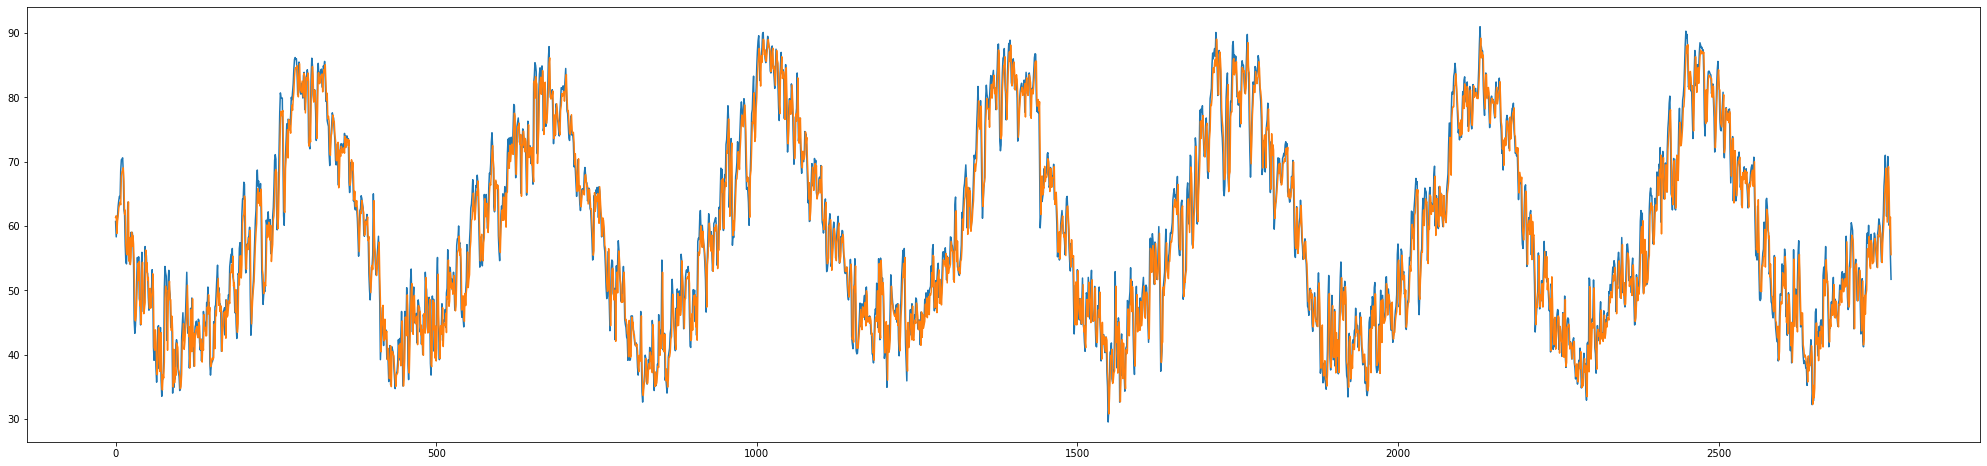

In [ ]:

pred=simple_gru_model.predict(x_test)
plt.figure(figsize=(35,8))
plt.plot(y_test)
plt.plot(pred.reshape(-1))

## Plot deep_GRU

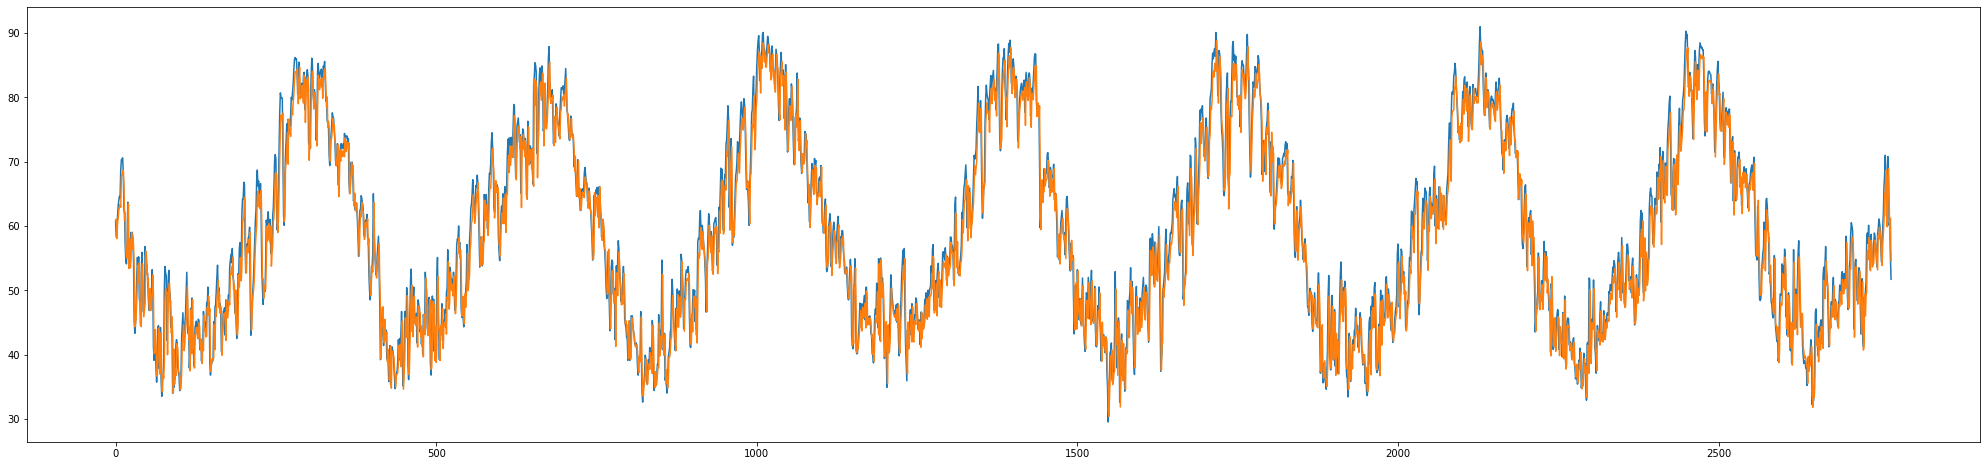

In [ ]:

pred=deep_gru_model.predict(x_test)
plt.figure(figsize=(35,8))
plt.plot(y_test)
plt.plot(pred.reshape(-1))

## Plot Conv1 GRU_deep

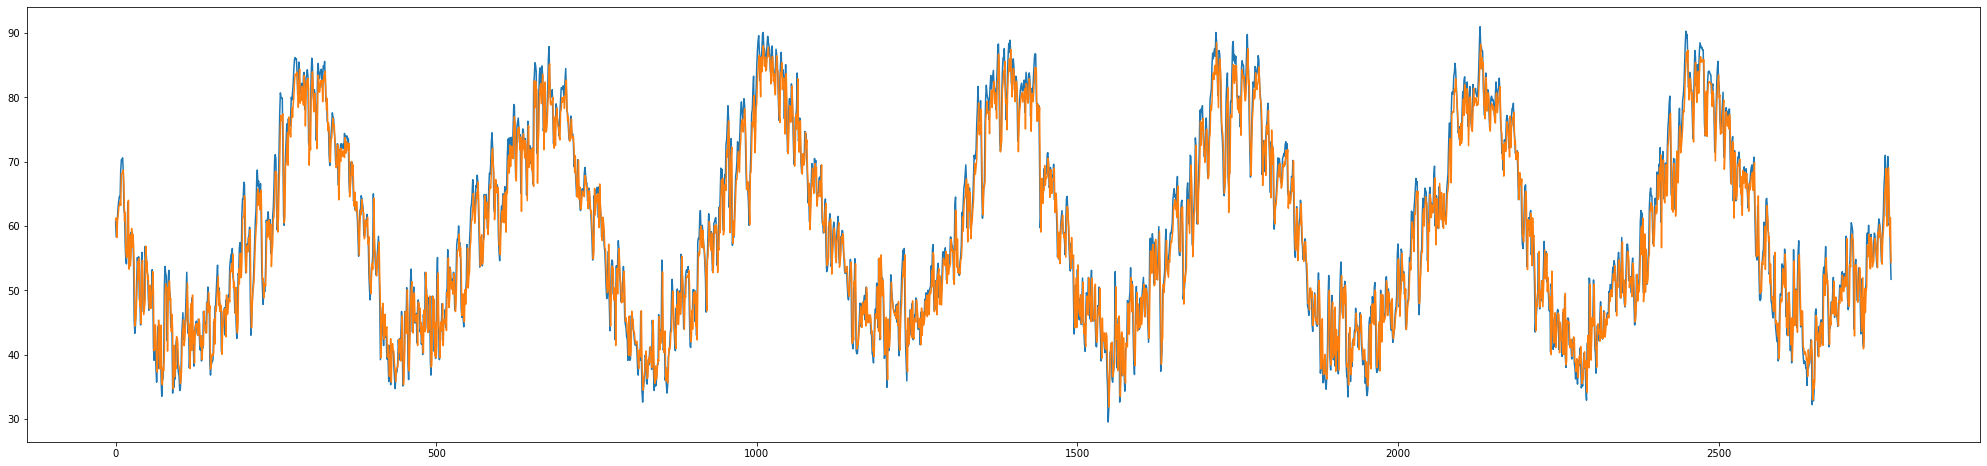

In [ ]:

pred=conv_gru_model.predict(x_test)
plt.figure(figsize=(35,8))
plt.plot(y_test)
plt.plot(pred.reshape(-1))

## Plot Conv 1 GRU_deep with Huber

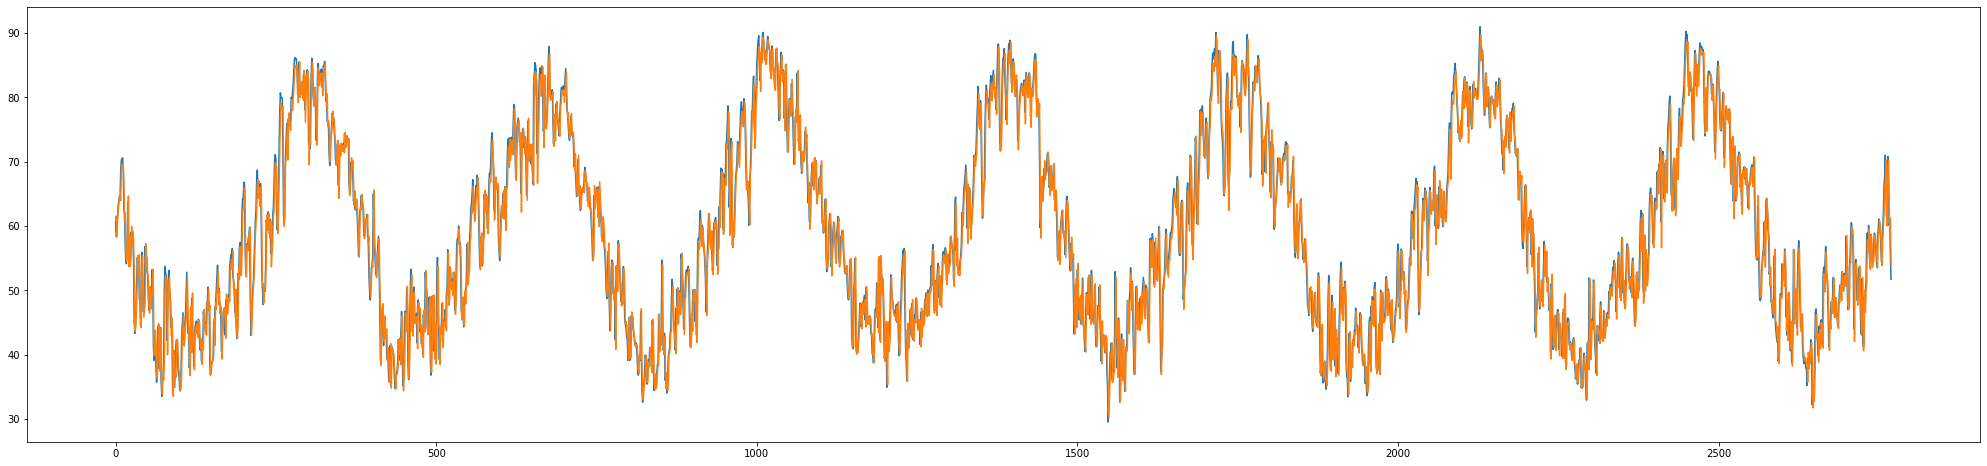

In [ ]:


pred=huber_gru_model.predict(x_test)
plt.figure(figsize=(35,8))
plt.plot(y_test)
plt.plot(pred.reshape(-1))

## <font color=red>As shown in this figure this is the best model

## Plot Conv 1 GRU Bidirectional with Huber

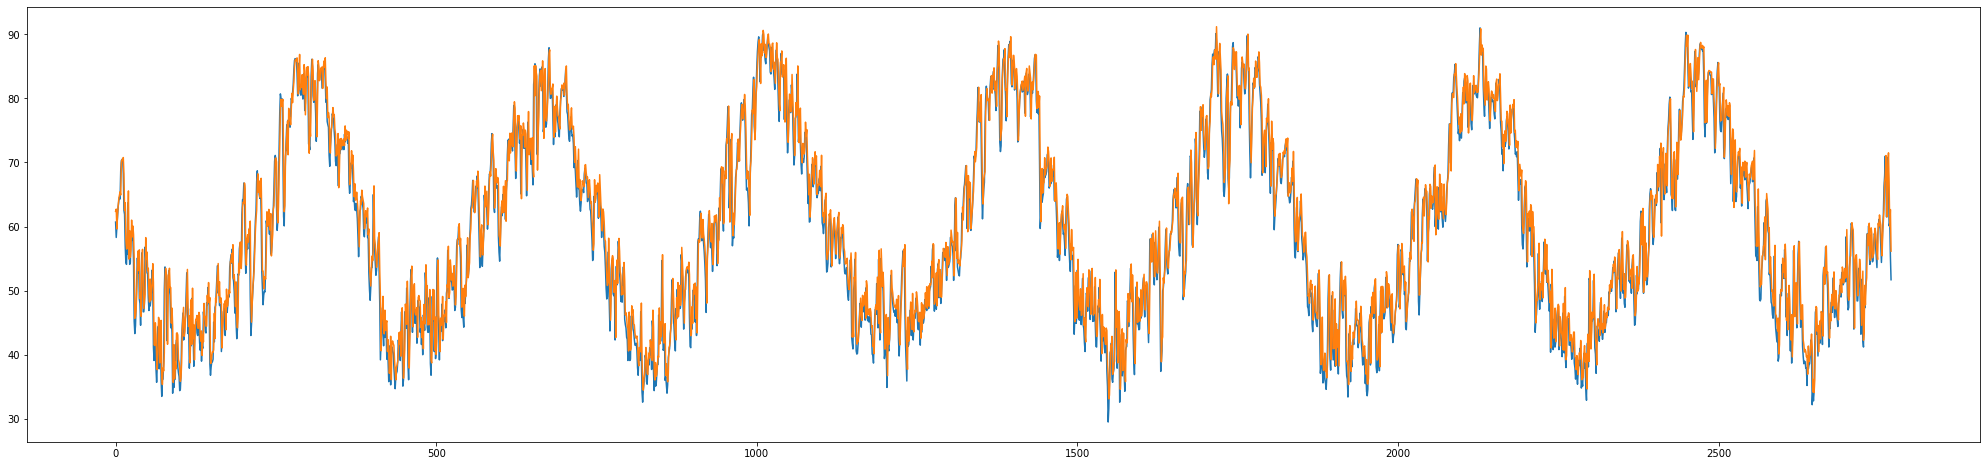

In [ ]:

pred=huber_bigru_model.predict(x_test)
plt.figure(figsize=(35,8))
plt.plot(y_test)
plt.plot(pred.reshape(-1))
